# Types of Sampling

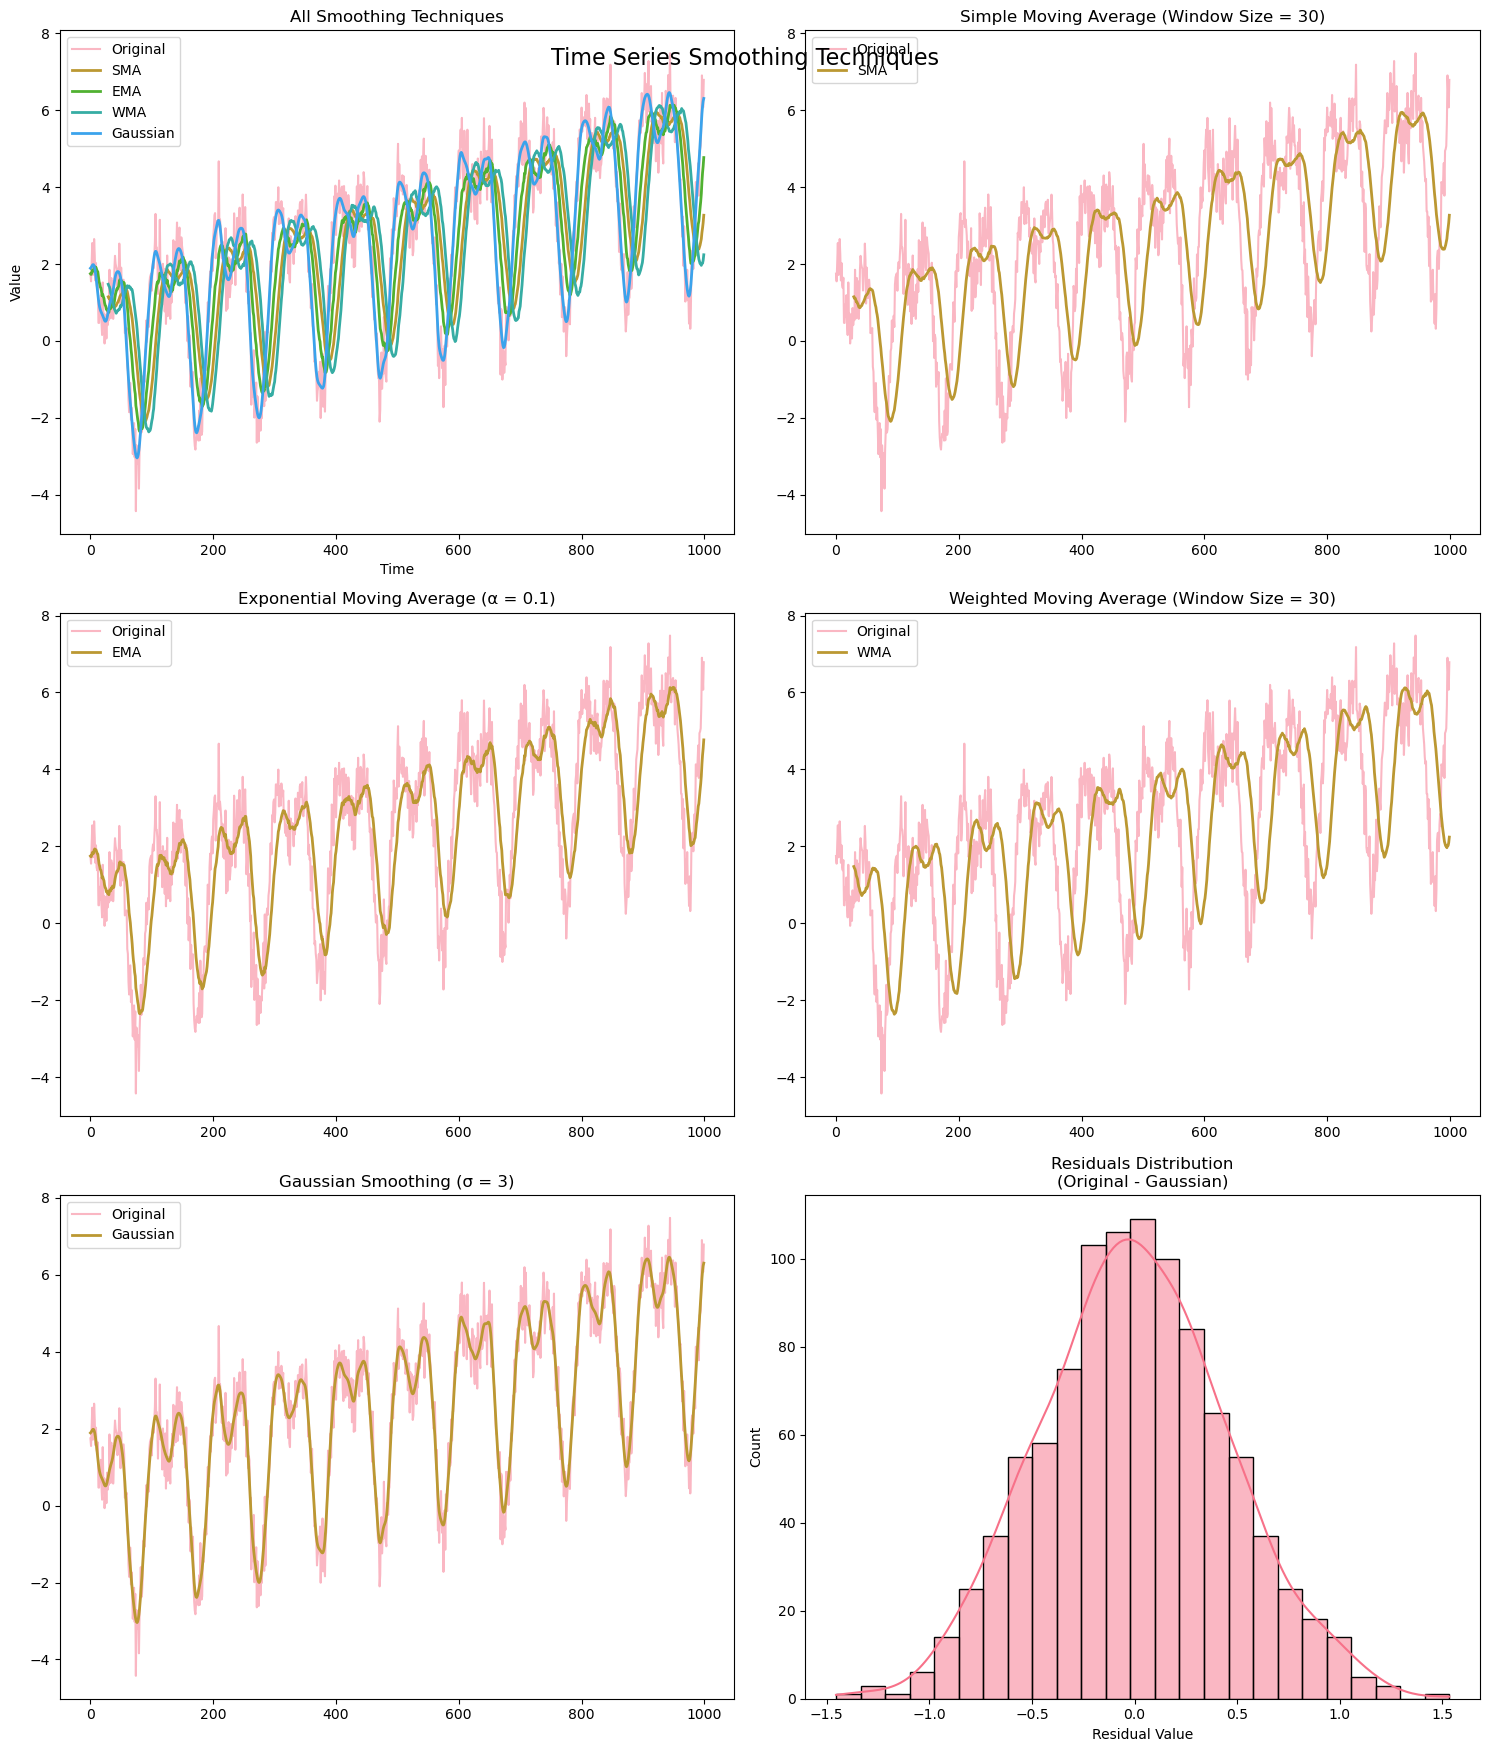


Simple Moving Average Performance Metrics:
Mean Squared Error: 3.2535
Mean Absolute Error: 1.4571
Standard Deviation of Residuals: 1.8030

Exponential Moving Average Performance Metrics:
Mean Squared Error: 1.2386
Mean Absolute Error: 0.9024
Standard Deviation of Residuals: 1.1126

Weighted Moving Average Performance Metrics:
Mean Squared Error: 5.3532
Mean Absolute Error: 1.8634
Standard Deviation of Residuals: 2.3128

Gaussian Smoothing Performance Metrics:
Mean Squared Error: 0.2053
Mean Absolute Error: 0.3607
Standard Deviation of Residuals: 0.4531


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set the style for better visualization
sns.set_palette("husl")

class TimeSeriesSmoothing:
    def __init__(self, data):
        self.data = np.array(data)
        
    def simple_moving_average(self, window_size):
        """Simple Moving Average (SMA)"""
        weights = np.ones(window_size) / window_size
        sma = np.convolve(self.data, weights, mode='valid')
        # Pad the beginning to match original data length
        padding = np.full(window_size-1, np.nan)
        return np.concatenate([padding, sma])
    
    def exponential_moving_average(self, alpha):
        """Exponential Moving Average (EMA)"""
        result = np.zeros_like(self.data)
        result[0] = self.data[0]
        for i in range(1, len(self.data)):
            result[i] = alpha * self.data[i] + (1 - alpha) * result[i-1]
        return result
    
    def weighted_moving_average(self, window_size):
        """Weighted Moving Average (WMA)"""
        weights = np.arange(1, window_size + 1)
        weights = weights / weights.sum()
        wma = np.convolve(self.data, weights, mode='valid')
        padding = np.full(window_size-1, np.nan)
        return np.concatenate([padding, wma])
    
    def gaussian_smoothing(self, sigma):
        """Gaussian Smoothing"""
        return gaussian_filter1d(self.data, sigma)
    
    def plot_all_smoothing(self, title="Time Series Smoothing Techniques"):
        """Plot all smoothing techniques in subplots"""
        # Calculate smoothed data
        sma = self.simple_moving_average(window_size=30)
        ema = self.exponential_moving_average(alpha=0.1)
        wma = self.weighted_moving_average(window_size=30)
        gaussian = self.gaussian_smoothing(sigma=3)
        
        # Create figure and subplots
        fig, axes = plt.subplots(3, 2, figsize=(15, 18))
        fig.suptitle(title, fontsize=16, y=0.95)
        
        # Original Data with all smoothing techniques
        axes[0, 0].plot(self.data, label='Original', alpha=0.5)
        axes[0, 0].plot(sma, label='SMA', linewidth=2)
        axes[0, 0].plot(ema, label='EMA', linewidth=2)
        axes[0, 0].plot(wma, label='WMA', linewidth=2)
        axes[0, 0].plot(gaussian, label='Gaussian', linewidth=2)
        axes[0, 0].set_title('All Smoothing Techniques')
        axes[0, 0].legend()
        axes[0, 0].set_xlabel('Time')
        axes[0, 0].set_ylabel('Value')
        
        # Simple Moving Average
        sns.lineplot(data=self.data, label='Original', alpha=0.5, ax=axes[0, 1])
        sns.lineplot(data=sma, label='SMA', linewidth=2, ax=axes[0, 1])
        axes[0, 1].set_title('Simple Moving Average (Window Size = 30)')
        axes[0, 1].legend()
        
        # Exponential Moving Average
        sns.lineplot(data=self.data, label='Original', alpha=0.5, ax=axes[1, 0])
        sns.lineplot(data=ema, label='EMA', linewidth=2, ax=axes[1, 0])
        axes[1, 0].set_title('Exponential Moving Average (α = 0.1)')
        axes[1, 0].legend()
        
        # Weighted Moving Average
        sns.lineplot(data=self.data, label='Original', alpha=0.5, ax=axes[1, 1])
        sns.lineplot(data=wma, label='WMA', linewidth=2, ax=axes[1, 1])
        axes[1, 1].set_title('Weighted Moving Average (Window Size = 30)')
        axes[1, 1].legend()
        
        # Gaussian Smoothing
        sns.lineplot(data=self.data, label='Original', alpha=0.5, ax=axes[2, 0])
        sns.lineplot(data=gaussian, label='Gaussian', linewidth=2, ax=axes[2, 0])
        axes[2, 0].set_title('Gaussian Smoothing (σ = 3)')
        axes[2, 0].legend()
        
        # Add Residual Plot
        residuals = self.data - gaussian  # Using Gaussian smoothing as example
        sns.histplot(data=residuals, kde=True, ax=axes[2, 1])
        axes[2, 1].set_title('Residuals Distribution\n(Original - Gaussian)')
        axes[2, 1].set_xlabel('Residual Value')
        axes[2, 1].set_ylabel('Count')
        
        plt.tight_layout()
        return fig

# Generate sample data
np.random.seed(42)
t = np.linspace(0, 10, 1000)
trend = 0.5 * t
seasonal = 2 * np.sin(2 * np.pi * t) + 1.5 * np.cos(4 * np.pi * t)
noise = 0.5 * np.random.randn(len(t))
data = trend + seasonal + noise

# Create and plot smoothed data
smoother = TimeSeriesSmoothing(data)
fig = smoother.plot_all_smoothing()
plt.show()

# Additional analysis: Compare smoothing techniques
def compare_smoothing_performance(original_data, smoothed_data, technique_name):
    """Calculate performance metrics for smoothing techniques"""
    residuals = original_data[~np.isnan(smoothed_data)] - smoothed_data[~np.isnan(smoothed_data)]
    mse = np.mean(residuals ** 2)
    mae = np.mean(np.abs(residuals))
    print(f"\n{technique_name} Performance Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Standard Deviation of Residuals: {np.std(residuals):.4f}")

# Compare performance of different techniques
sma = smoother.simple_moving_average(window_size=30)
ema = smoother.exponential_moving_average(alpha=0.1)
wma = smoother.weighted_moving_average(window_size=30)
gaussian = smoother.gaussian_smoothing(sigma=3)

techniques = {
    'Simple Moving Average': sma,
    'Exponential Moving Average': ema,
    'Weighted Moving Average': wma,
    'Gaussian Smoothing': gaussian
}

for name, smoothed in techniques.items():
    compare_smoothing_performance(data, smoothed, name)

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [151]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\AirPassengers.csv', index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


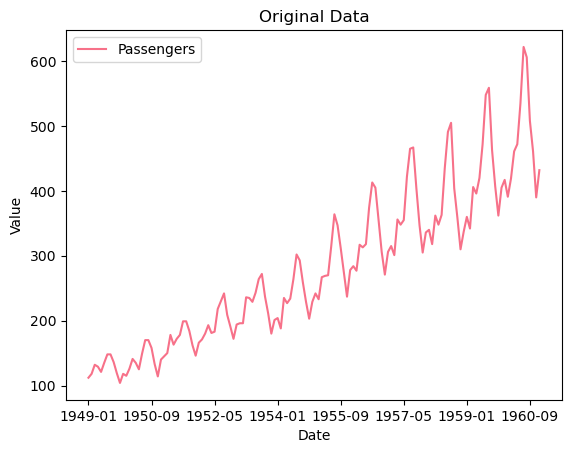

In [ ]:

df.plot()
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [153]:
df.index = pd.DatetimeIndex(df.index).to_period('M')
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


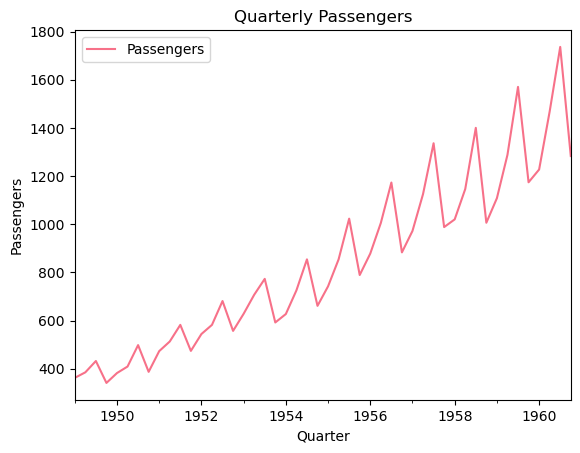

In [ ]:
m_pass =  df.resample('Q').sum()
m_pass.index.rename('Quarter', inplace=True)
m_pass.plot()
plt.title('Quarterly Passengers')
plt.xlabel('Quarter')
plt.ylabel('Passengers')
plt.show()

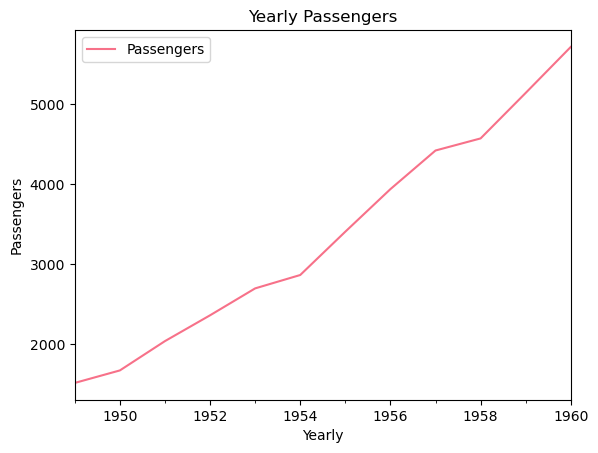

In [155]:
m_pass =  df.resample('Y').sum()
m_pass.index.rename('Quarter', inplace=True)
m_pass.plot()
plt.title('Yearly Passengers')
plt.xlabel('Yearly')
plt.ylabel('Passengers')
plt.show()

# Components of Time Series


![alt text](image.png)
 
 

### 1. Trend
The long-term increase or decrease in the data over time. This represents the overall direction (upward, downward, or flat) of the series without short-term fluctuations.

### 2. Seasonality
Regular, repeating patterns or cycles in the data that occur at fixed intervals (e.g., monthly, quarterly, or yearly). Seasonality captures patterns such as increased retail sales during holidays.

### 3. Cyclic
Fluctuations that are not of fixed frequency but occur due to external economic or business cycles, lasting longer than seasonality. Cyclic patterns may span several years (e.g., business cycles).

### 4. Residual (Noise)
The random or irregular component that cannot be attributed to trend, seasonality, or cyclic factors. This captures the randomness and unexplainable variation in the data.

#### **Combining Components**
 
These components can be combined additively or multiplicatively:

##### Additive Model
```python
Time Series = Trend + Seasonality + Cyclic + Residual
```

##### Multiplicative Model
```python
Time Series = Trend * Seasonality * Cyclic * Residual 
```
 

---


In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [157]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\AirPassengers.csv', index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


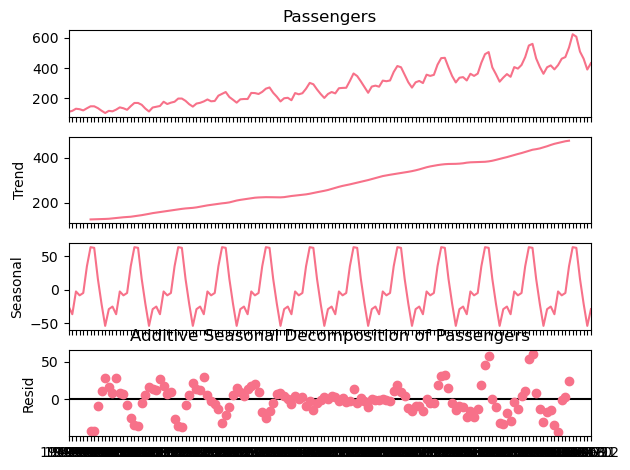

In [158]:
result = seasonal_decompose(df['Passengers'], model='additive', period=12)
result.plot()
plt.title('Additive Seasonal Decomposition of Passengers')
plt.show()

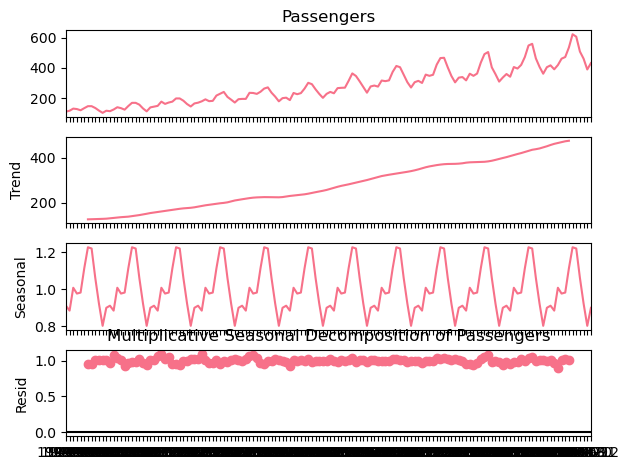

In [159]:
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
result.plot()
plt.title('Multiplicative Seasonal Decomposition of Passengers')
plt.show()

### Seasonal Naive Forecasting

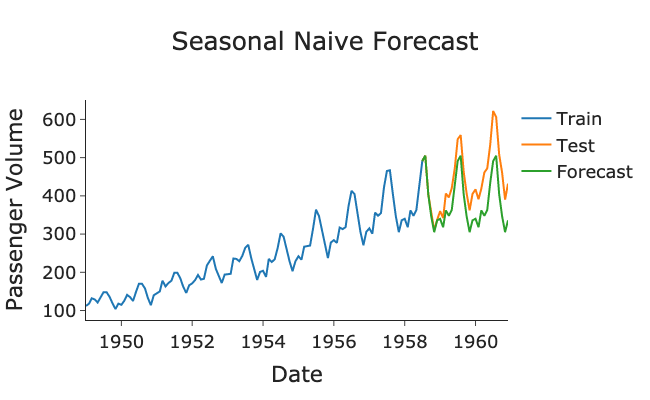


A **seasonal naive forecast** is a simple forecasting method where each forecast is set equal to the last observed value from the same season. It’s commonly used in time series data with clear seasonal patterns, like monthly or quarterly data.

##### Steps for a Seasonal Naive Forecast
1. **Identify Seasonality**: Determine the seasonal period (e.g., 12 for monthly data in yearly cycles).
2. **Set Forecasts**: For each point in the forecast horizon, set the forecast equal to the corresponding point from the previous season.

##### Example

If the data is monthly with a seasonal period of 12 (e.g., January, February, etc.), then:

- The forecast for January next year = observed value from January this year
- The forecast for February next year = observed value from February this year, and so on.


##### Pros and Cons
- **Pros**: Simple to implement, often effective for strongly seasonal data.
- **Cons**: Ignores trends and other patterns; limited to series with stable seasonality.


###  Window Average Forecasting

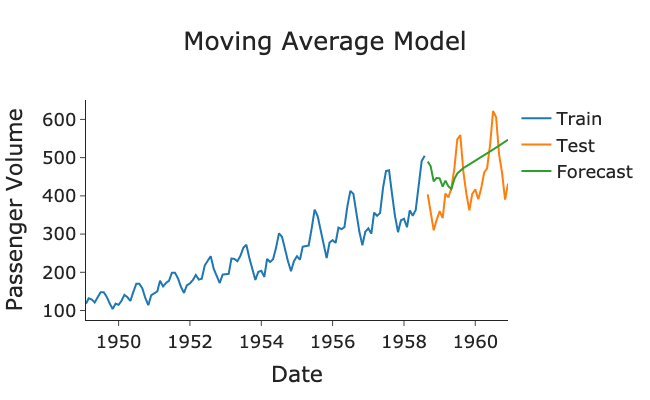

**Window average forecasting** (or rolling average forecasting) is a method that uses the average of the most recent values within a specified "window" as the forecast. This approach is suitable for data with little trend or seasonal structure, where recent values are indicative of future values.

##### Steps for Window Average Forecasting
1. **Choose a Window Size**: Decide on the number of past data points (window size) to include in the average.
2. **Calculate Rolling Average**: For each time point in the forecast horizon, compute the average of the last `N` observations (where `N` is the window size).
3. **Generate Forecasts**: Use the calculated rolling average as the forecast for each step in the forecast horizon.

##### Example
Suppose you have daily sales data and want to forecast tomorrow’s sales using the average of the last 7 days.
 

##### Pros and Cons
- **Pros**: Smooths out short-term fluctuations; effective for stable, non-seasonal data.
- **Cons**: Ignores trends and seasonality; unsuitable for series with strong seasonal or trend components.

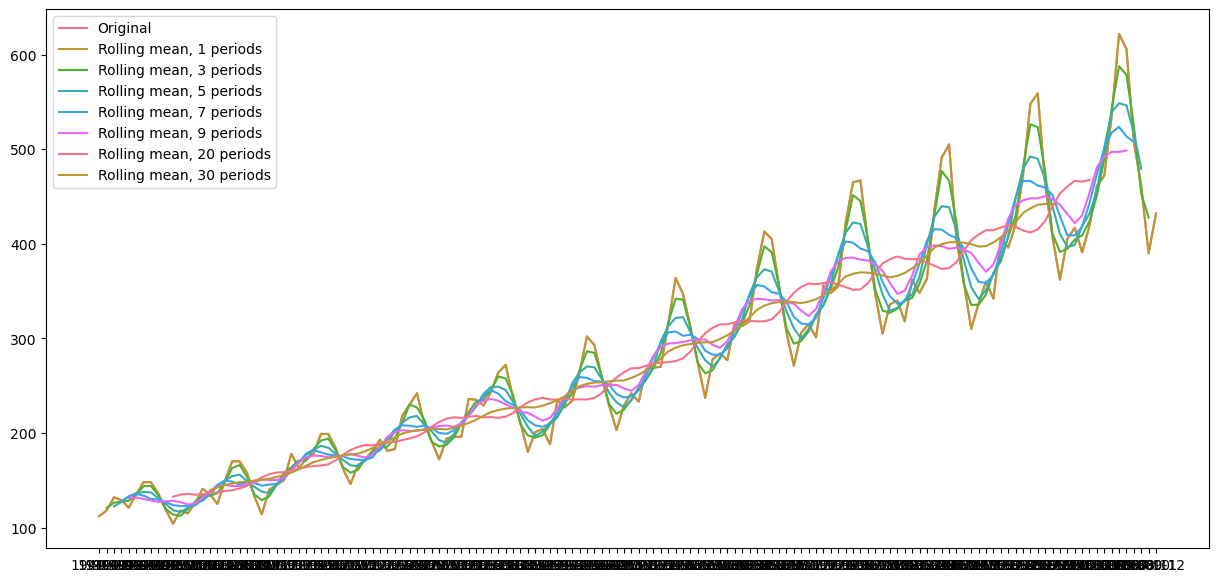

In [160]:
plt.figure(figsize=(15,7))
plt.plot(df['Passengers'], label='Original')
for i in [1, 3, 5, 7, 9, 20, 30]:
    rolling = df.rolling(window=i, center=True).mean()
    plt.plot(rolling, label=f'Rolling mean, {i} periods')
plt.legend(loc='best')
plt.show()

In [161]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\AirPassengers.csv', index_col=0)
y = df['Passengers']
y.shape

(144,)

Temporal Train-Test Split

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

train_size = 132
y_train = y[:train_size]
y_test = y[train_size:]

# Trailing moving average
span = 3
f_cast = y_train.rolling(window=span, center=False).mean()

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error


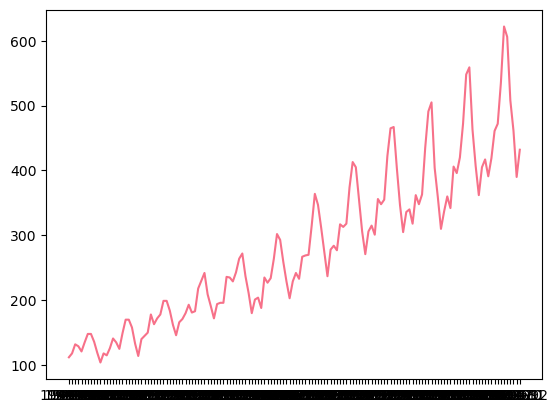

In [164]:
from matplotlib import pyplot as plt
plt.plot(df)
plt.show()

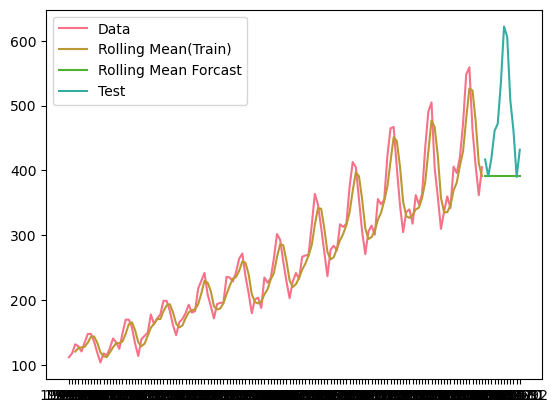

In [165]:
span = 3              # window size
fcast = y_train.rolling(span, center=False).mean()

MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index = y_test.index)
plt.plot(y_train, label = 'Data')
plt.plot(fcast, label='Rolling Mean(Train)')
plt.plot(MA_fcast, label='Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()


In [166]:
span=7
fcast = y_train.rolling(span, center=False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
root_mean_squared_error(y_test, MA_fcast)

76.28653914303472

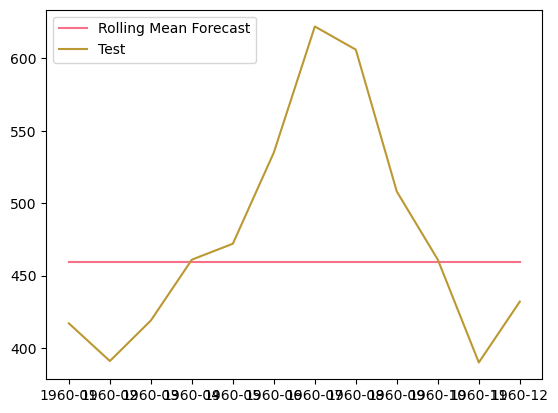

In [167]:
plt.plot(MA_fcast, label='Rolling Mean Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

#### Simple Exponential Smoothing

In [168]:
train_size = 132
y_train = y[:train_size]
y_test = y[train_size:]

In [169]:
from statsmodels.tsa.api import SimpleExpSmoothing
alpha=0.3
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

In [170]:
fcast1

1960-01-01    421.786974
1960-02-01    421.786974
1960-03-01    421.786974
1960-04-01    421.786974
1960-05-01    421.786974
1960-06-01    421.786974
1960-07-01    421.786974
1960-08-01    421.786974
1960-09-01    421.786974
1960-10-01    421.786974
1960-11-01    421.786974
1960-12-01    421.786974
Freq: MS, dtype: float64

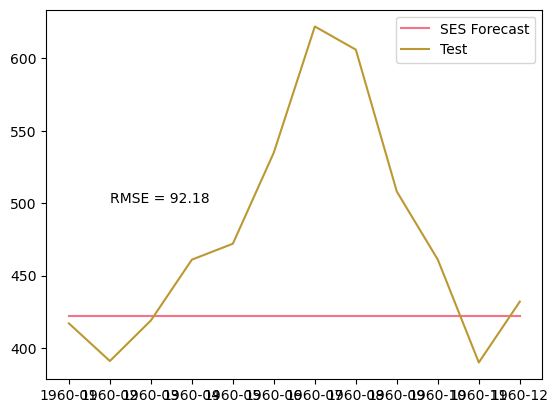

In [171]:


ses_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, ses_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error))
plt.plot(ses_fcast, label='SES Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

In [172]:
from statsmodels.tsa.api import SimpleExpSmoothing

alpha=0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))


In [173]:
fcast1

1960-01-01    425.974608
1960-02-01    425.974608
1960-03-01    425.974608
1960-04-01    425.974608
1960-05-01    425.974608
1960-06-01    425.974608
1960-07-01    425.974608
1960-08-01    425.974608
1960-09-01    425.974608
1960-10-01    425.974608
1960-11-01    425.974608
1960-12-01    425.974608
Freq: MS, dtype: float64

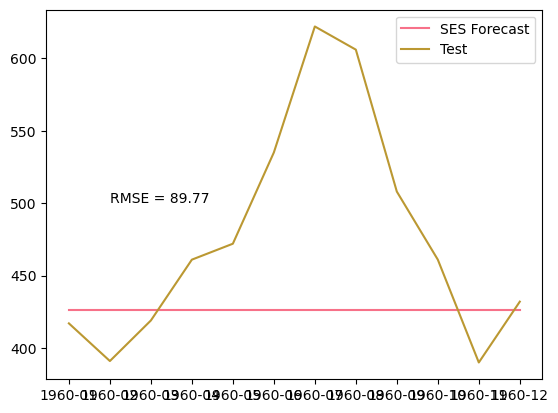

In [174]:

ses_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, ses_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error))
plt.plot(ses_fcast, label='SES Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

#### Holt's Linear Trend

In [175]:
from statsmodels.tsa.api import Holt

holt= Holt(y_train)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))


In [176]:
fcast1

1960-01-01    467.194560
1960-02-01    464.806361
1960-03-01    462.418162
1960-04-01    460.029964
1960-05-01    457.641765
1960-06-01    455.253566
1960-07-01    452.865368
1960-08-01    450.477169
1960-09-01    448.088970
1960-10-01    445.700771
1960-11-01    443.312573
1960-12-01    440.924374
Freq: MS, dtype: float64

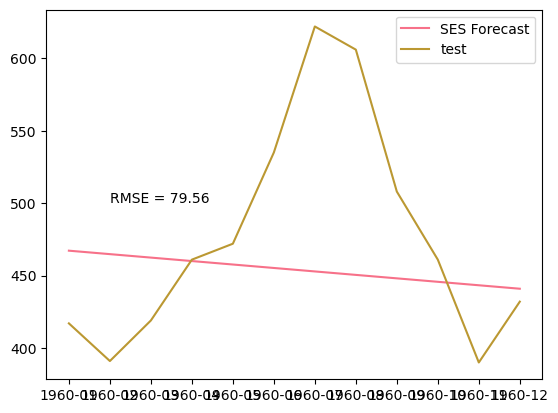

In [177]:
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error))
plt.plot(holt_fcast, label='SES Forecast')
plt.plot(y_test, label='test')
plt.legend(loc='best')
plt.show()

#### Holt's Exponential Trend

In [178]:
from statsmodels.tsa.api import Holt

holt= Holt(y_train, exponential=True)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))


In [179]:
fcast1

1960-01-01    479.601431
1960-02-01    479.348256
1960-03-01    479.095216
1960-04-01    478.842308
1960-05-01    478.589534
1960-06-01    478.336894
1960-07-01    478.084387
1960-08-01    477.832013
1960-09-01    477.579773
1960-10-01    477.327665
1960-11-01    477.075691
1960-12-01    476.823850
Freq: MS, dtype: float64

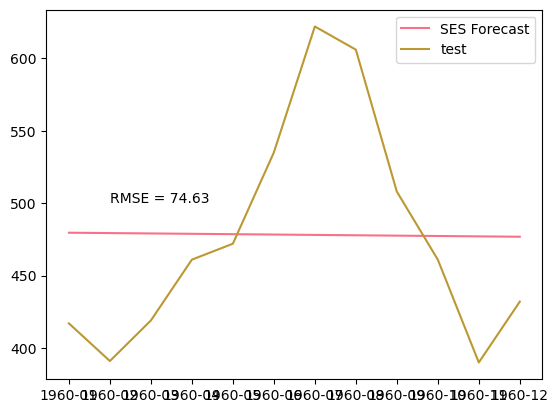

In [180]:
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error))
plt.plot(holt_fcast, label='SES Forecast')
plt.plot(y_test, label='test')
plt.legend(loc='best')
plt.show()

#### Additive Damping Trend

In [181]:
holt_additive_damped = Holt(y_train, damped_trend=True)
alpha_additive, beta_additive = 0.2, 0.4
fit_additive = holt_additive_damped.fit(smoothing_level=alpha_additive, smoothing_trend=beta_additive)
 = fit_additive.forecast(len(y_test))


IndentationError: unexpected indent (100122151.py, line 4)

In [ ]:
fcast_additive

1960-01-01    465.377135
1960-02-01    462.568539
1960-03-01    459.788029
1960-04-01    457.035324
1960-05-01    454.310146
1960-06-01    451.612220
1960-07-01    448.941273
1960-08-01    446.297036
1960-09-01    443.679241
1960-10-01    441.087623
1960-11-01    438.521923
1960-12-01    435.981879
Freq: MS, dtype: float64

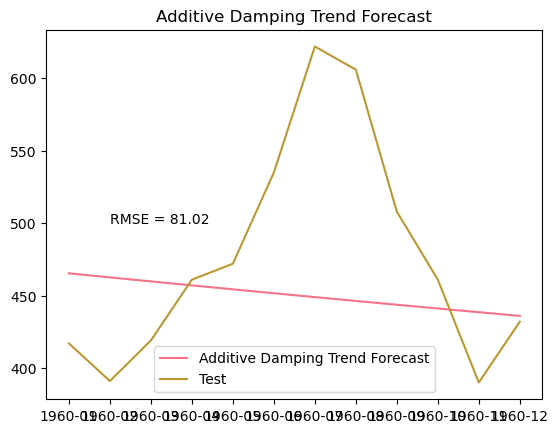

In [ ]:

holt_additive_fcast = pd.Series(fcast_additive, index=y_test.index)
error_additive = round(root_mean_squared_error(y_test, holt_additive_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error_additive))
plt.plot(holt_additive_fcast, label='Additive Damping Trend Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.title('Additive Damping Trend Forecast')
plt.show()

#### Multiplicative Damping Trend

In [ ]:

# Multiplicative Damping Trend
holt_multiplicative_damped = Holt(y_train, exponential=True, damped_trend=True)
alpha_multiplicative, beta_multiplicative = 0.2, 0.4
fit_multiplicative = holt_multiplicative_damped.fit(smoothing_level=alpha_multiplicative, smoothing_trend=beta_multiplicative)
fcast_multiplicative = fit_multiplicative.forecast(len(y_test))



In [ ]:
fcast_multiplicative

1960-01-01    477.226684
1960-02-01    476.367532
1960-03-01    475.518494
1960-04-01    474.679438
1960-05-01    473.850231
1960-06-01    473.030742
1960-07-01    472.220845
1960-08-01    471.420412
1960-09-01    470.629321
1960-10-01    469.847448
1960-11-01    469.074673
1960-12-01    468.310878
Freq: MS, dtype: float64

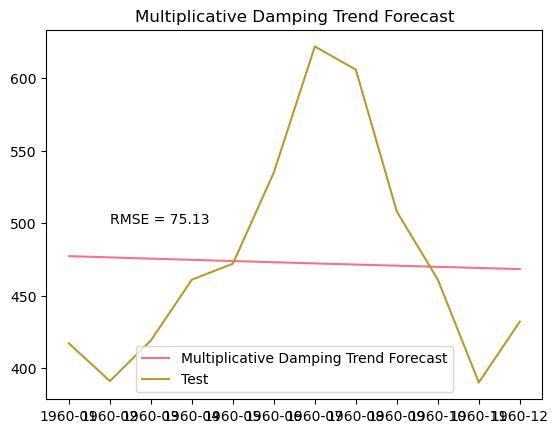

In [ ]:

holt_multiplicative_fcast = pd.Series(fcast_multiplicative, index=y_test.index)
error_multiplicative = round(root_mean_squared_error(y_test, holt_multiplicative_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error_multiplicative))
plt.plot(holt_multiplicative_fcast, label='Multiplicative Damping Trend Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.title('Multiplicative Damping Trend Forecast')
plt.show()


#### Holt-Winters Additive Method

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Additive Trend
alpha, beta, gamma = 0.2, 0.7, 0.7
holt_winters_additive = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
holt_winters_additive_fit = holt_winters_additive.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Forecasting the test period
fcast_hw_additive = holt_winters_additive_fit.forecast(len(y_test))



In [ ]:
fcast_hw_additive

1960-01-01    415.456607
1960-02-01    397.090593
1960-03-01    457.472802
1960-04-01    445.371124
1960-05-01    466.189919
1960-06-01    520.734808
1960-07-01    592.426307
1960-08-01    598.845482
1960-09-01    498.830393
1960-10-01    442.384502
1960-11-01    396.517187
1960-12-01    424.295185
Freq: MS, dtype: float64

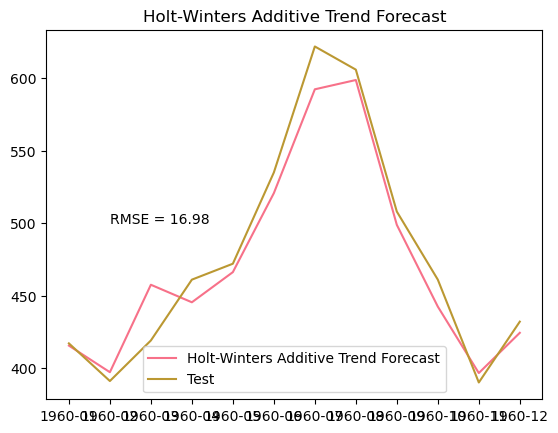

In [ ]:
holt_winters_additive_fcast = pd.Series(fcast_hw_additive, index=y_test.index)
error_hw_additive = round(root_mean_squared_error(y_test, holt_winters_additive_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error_hw_additive))
plt.plot(holt_winters_additive_fcast, label='Holt-Winters Additive Trend Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.title('Holt-Winters Additive Trend Forecast')
plt.show()


#### Auto tuning - Holt-Winters Additive Trend


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Additive Trend
holt_winters_additive = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
holt_winters_additive_fit = holt_winters_additive.fit()

# Forecasting the test period
fcast_hw_additive = holt_winters_additive_fit.forecast(len(y_test))
print(holt_winters_additive_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          17837.582
Optimized:                         True   AIC                            679.626
Trend:                         Additive   BIC                            725.751
Seasonal:                      Additive   AICC                           685.680
Seasonal Periods:                    12   Date:                 Wed, 13 Nov 2024
Box-Cox:                          False   Time:                         14:40:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2511602                alpha                 True
smoothing_trend          

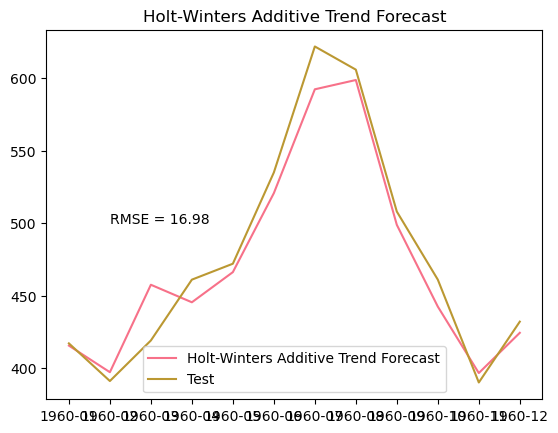

In [ ]:

holt_winters_additive_fcast = pd.Series(fcast_hw_additive, index=y_test.index)
error_hw_additive = round(root_mean_squared_error(y_test, holt_winters_additive_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error_hw_additive))
plt.plot(holt_winters_additive_fcast, label='Holt-Winters Additive Trend Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.title('Holt-Winters Additive Trend Forecast')
plt.show()


#### Holt-Winters Multiplicative Trend

In [188]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.api import Holt    

# Holt-Winters Multiplicative Trend 
alpha, beta, gamma = 0.2, 0.7, 0.7
holt_winters_multiplicative = ExponentialSmoothing(y_train, trend='mul', seasonal='mul', seasonal_periods=12)           
holt_winters_multiplicative_fit = holt_winters_multiplicative.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Forecasting the test period
fcast_hw_multiplicative = holt_winters_multiplicative_fit.forecast(len(y_test))
 

In [183]:
fcast_hw_multiplicative

1960-01-01    427.020115
1960-02-01    410.923431
1960-03-01    489.496615
1960-04-01    479.147771
1960-05-01    507.862114
1960-06-01    582.814908
1960-07-01    681.535074
1960-08-01    703.190818
1960-09-01    585.416070
1960-10-01    518.997823
1960-11-01    462.030990
1960-12-01    505.335830
Freq: MS, dtype: float64

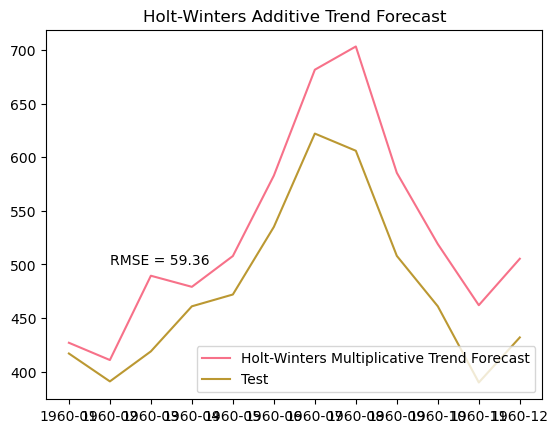

In [189]:

fcast_hw_multiplicative_fcast = pd.Series(fcast_hw_multiplicative, index=y_test.index)
error_hw_multiplicative = round(root_mean_squared_error(y_test, fcast_hw_multiplicative_fcast), 2)

plt.text(1, 500, "RMSE = " + str(error_hw_multiplicative))
plt.plot(fcast_hw_multiplicative_fcast, label='Holt-Winters Multiplicative Trend Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.title('Holt-Winters Additive Trend Forecast')
plt.show()
